In [2]:
import pandas as pd
import numpy as np
import statistics as sta
import warnings
warnings.filterwarnings('ignore')

In [12]:
Accuse = pd.read_csv('MergingData/DataAccuse.csv')
DemandRights = pd.read_csv('MergingData/DataDemandRights.csv')
#Demo = pd.read_csv('MergingData/DataDemo.csv')
Investigation = pd.read_csv('MergingData/DataInvestigation.csv')
RRRights = pd.read_csv('MergingData/DataRRRights.csv')
Cow = pd.read_csv('MergingData/DataCOW.csv')

dataset = Accuse.append([DemandRights,Investigation,RRRights], ignore_index=True)
dataset[-6:-1]


,Date,Country,CountryCode,CountryCat,HRTopic,AvgTone,SourceURL
17104,20181113,United States,USA,developed,reject request rights,-3.379722,http://www.dailycommercial.com/opinion/2018111...
17105,20181113,United States,USA,developed,reject request rights,1.230769,http://www.wilsontimes.com/stories/time-to-cre...
17106,20181113,United States,USA,developed,reject request rights,4.545455,https://usa.inquirer.net/16765/supporters-vow-...
17107,20181113,Myanmar,MMR,developing,reject request rights,-3.984064,https://www.timesnownews.com/international/art...
17108,20181113,Myanmar,MMR,developing,reject request rights,-4.114710,https://www.business-standard.com/article/pti-...


# create data HRcases

In [5]:
DataByCountry = dataset.groupby('CountryCode').count()[['SourceURL']]
DataByCountry.sort_values(by=['SourceURL'],ascending = False)

countCode = DataByCountry.index
totNews = DataByCountry.SourceURL.values
dataCountry = pd.DataFrame({'CountryCode':countCode,'HRcases':totNews})
dataCountry = dataCountry.sort_values(by=['HRcases'],ascending = False)
dataCountry.to_csv('MergingData/DataHRcases.csv', index=False)

# data HRcases + GDP dll

In [6]:
DataHRcases = pd.read_csv('MergingData/DataHRcases.csv')
DataHRcases.HRcases.values
datasetGDP = DataHRcases.merge(Cow, on='CountryCode',how='left' )
datasetGDP.dropna(inplace=True)

datasetGDP[datasetGDP.isnull().any(axis=1)]

,CountryCode,HRcases,Region,Population,Area,Density,Coastline,NetMigration,InfantMortality,GDP,...,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service


In [7]:
datasetGDP['Density'] = [x.replace(',', '.') for x in datasetGDP['Density']]
datasetGDP['Density'] = datasetGDP['Density'].astype(float)

datasetGDP['Coastline'] = [x.replace(',', '.') for x in datasetGDP['Coastline']]
datasetGDP['Coastline'] = datasetGDP['Coastline'].astype(float)

datasetGDP['NetMigration'] = [x.replace(',', '.') for x in datasetGDP['NetMigration']]
datasetGDP['NetMigration'] = datasetGDP['NetMigration'].astype(float)

datasetGDP['InfantMortality'] = [x.replace(',', '.') for x in datasetGDP['InfantMortality']]
datasetGDP['InfantMortality'] = datasetGDP['InfantMortality'].astype(float)

datasetGDP['Literacy'] = [x.replace(',', '.') for x in datasetGDP['Literacy']]
datasetGDP['Literacy'] = datasetGDP['Literacy'].astype(float)

datasetGDP['Phones'] = [x.replace(',', '.') for x in datasetGDP['Phones']]
datasetGDP['Phones'] = datasetGDP['Phones'].astype(float)

datasetGDP['Arable'] = [y.replace(',', '.') for y in datasetGDP['Arable']]
datasetGDP['Arable'] = datasetGDP['Arable'].astype(float)

datasetGDP['Crops'] = [y.replace(',', '.') for y in datasetGDP['Crops']]
datasetGDP['Crops'] = datasetGDP['Crops'].astype(float)

datasetGDP['Other'] = [y.replace(',', '.') for y in datasetGDP['Other']]
datasetGDP['Other'] = datasetGDP['Other'].astype(float)

datasetGDP['Climate'] = [y.replace(',', '.') for y in datasetGDP['Climate']]
datasetGDP['Climate'] = datasetGDP['Climate'].astype(float)

datasetGDP['Birthrate'] = [y.replace(',', '.') for y in datasetGDP['Birthrate']]
datasetGDP['Birthrate'] = datasetGDP['Birthrate'].astype(float)

datasetGDP['Deathrate'] = [y.replace(',', '.') for y in datasetGDP['Deathrate']]
datasetGDP['Deathrate'] = datasetGDP['Deathrate'].astype(float)

datasetGDP['Agriculture'] = [x.replace(',', '.') for x in datasetGDP['Agriculture']]
datasetGDP['Agriculture'] = datasetGDP['Agriculture'].astype(float)

datasetGDP['Industry'] = [x.replace(',', '.') for x in datasetGDP['Industry']]
datasetGDP['Industry'] = datasetGDP['Industry'].astype(float)

datasetGDP['Service'] = [x.replace(',', '.') for x in datasetGDP['Service']]
datasetGDP['Service'] = datasetGDP['Service'].astype(float)

In [99]:
datasetGDP.columns

Index(['CountryCode', 'HRcases', 'Region', 'Population', 'Area', 'Density',
       'Coastline', 'NetMigration', 'InfantMortality', 'GDP', 'Literacy',
       'Phones', 'Arable', 'Crops', 'Other', 'Climate', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service', 'High_Low_GDP'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0D3716F0>,
      dtype=object)

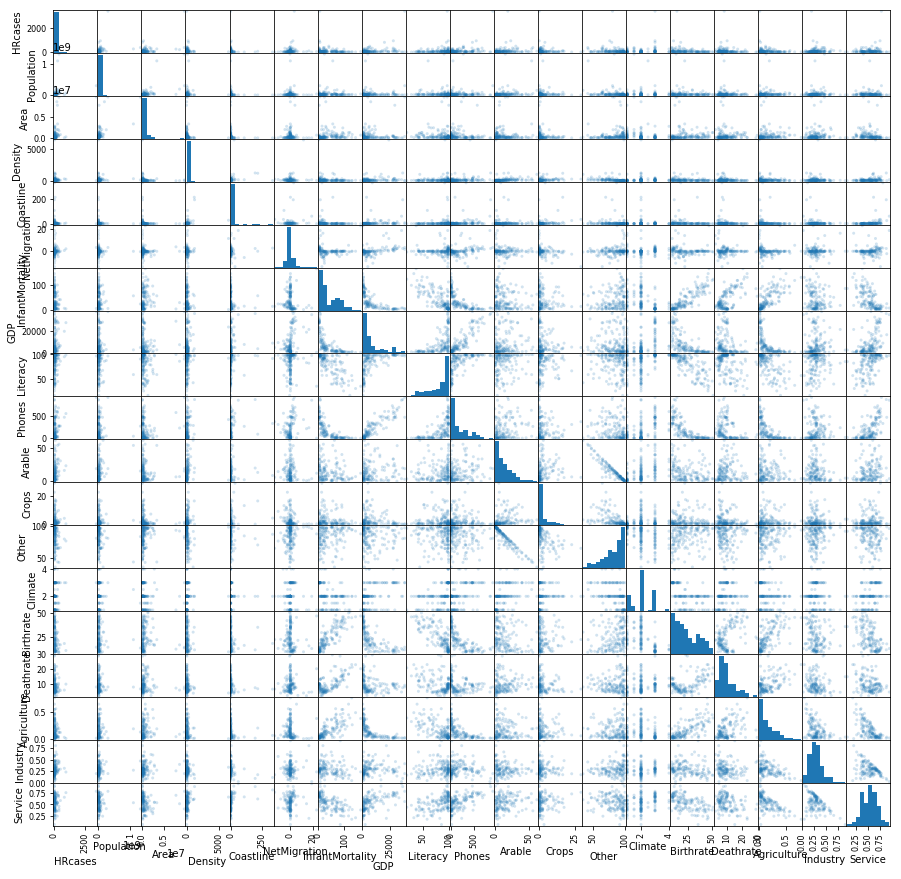

In [9]:
matrixCorr = pd.plotting.scatter_matrix(datasetGDP, alpha=0.2, figsize=(15,15))
matrixCorr

In [107]:
datasetGDP.corr()
# dengan kolom yg memliki korealasi thd HRcases adalah
# population(0.265178), area(0.542397), GDP(0.311181), Phones (0.354123), Literacy(0.141553)

,HRcases,Population,Area,Density,Coastline,NetMigration,InfantMortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
HRcases,1.000000,0.265178,0.542397,-0.023667,-0.055268,0.083705,-0.174021,0.311181,0.141553,0.354123,0.124893,-0.070656,-0.089245,0.155724,-0.180784,-0.091302,-0.165174,-0.002750,0.163474
Population,0.265178,1.000000,0.604063,0.005877,-0.060480,-0.007773,-0.020698,-0.034028,-0.021421,0.010868,0.207564,-0.040495,-0.173417,-0.015219,-0.088008,-0.079466,-0.017309,0.080579,-0.050786
Area,0.542397,0.604063,1.000000,-0.092068,-0.100840,0.036450,-0.033975,0.079111,0.031866,0.110458,-0.077282,-0.178653,0.127797,-0.092923,-0.070972,-0.063585,-0.034125,0.080465,-0.033907
Density,-0.023667,0.005877,-0.092068,1.000000,0.192217,0.206518,-0.151613,0.190387,0.084995,0.167809,0.068265,0.057896,-0.080254,0.007468,-0.156179,-0.154201,-0.141466,-0.029332,0.162849
Coastline,-0.055268,-0.060480,-0.100840,0.192217,1.000000,0.060344,-0.134574,0.137876,0.117940,0.218600,-0.040566,0.192532,-0.026308,-0.018307,-0.096713,-0.131762,-0.139400,-0.203573,0.309773
NetMigration,0.083705,-0.007773,0.036450,0.206518,0.060344,1.000000,0.021717,0.367806,-0.048677,0.227397,-0.090154,-0.326542,0.187562,-0.088643,-0.016690,0.032904,-0.045873,0.028656,0.019693
InfantMortality,-0.174021,-0.020698,-0.033975,-0.151613,-0.134574,0.021717,1.000000,-0.655991,-0.743988,-0.699455,-0.178481,-0.145448,0.207967,-0.396730,0.868087,0.663493,0.759445,-0.131700,-0.617942
GDP,0.311181,-0.034028,0.079111,0.190387,0.137876,0.367806,-0.655991,1.000000,0.538235,0.914156,0.081568,-0.155264,-0.022738,0.389482,-0.665310,-0.251157,-0.613232,0.026866,0.570691
Literacy,0.141553,-0.021421,0.031866,0.084995,0.117940,-0.048677,-0.743988,0.538235,1.000000,0.592820,0.112321,0.045972,-0.115981,0.416701,-0.792891,-0.390351,-0.604182,0.112770,0.483573
Phones,0.354123,0.010868,0.110458,0.167809,0.218600,0.227397,-0.699455,0.914156,0.592820,1.000000,0.162236,-0.049608,-0.129683,0.444792,-0.733971,-0.299525,-0.623752,-0.060386,0.655623


In [100]:
datasetGDP.corr()
# f, ax = plt.subplots(figsize = (20,6))
# sns.heatmap(datasetGDP.corr(), annot=True)
# plt.show()

,HRcases,Population,Area,Density,Coastline,NetMigration,InfantMortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
HRcases,1.000000,0.265178,0.542397,-0.023667,-0.055268,0.083705,-0.174021,0.311181,0.141553,0.354123,0.124893,-0.070656,-0.089245,0.155724,-0.180784,-0.091302,-0.165174,-0.002750,0.163474
Population,0.265178,1.000000,0.604063,0.005877,-0.060480,-0.007773,-0.020698,-0.034028,-0.021421,0.010868,0.207564,-0.040495,-0.173417,-0.015219,-0.088008,-0.079466,-0.017309,0.080579,-0.050786
Area,0.542397,0.604063,1.000000,-0.092068,-0.100840,0.036450,-0.033975,0.079111,0.031866,0.110458,-0.077282,-0.178653,0.127797,-0.092923,-0.070972,-0.063585,-0.034125,0.080465,-0.033907
Density,-0.023667,0.005877,-0.092068,1.000000,0.192217,0.206518,-0.151613,0.190387,0.084995,0.167809,0.068265,0.057896,-0.080254,0.007468,-0.156179,-0.154201,-0.141466,-0.029332,0.162849
Coastline,-0.055268,-0.060480,-0.100840,0.192217,1.000000,0.060344,-0.134574,0.137876,0.117940,0.218600,-0.040566,0.192532,-0.026308,-0.018307,-0.096713,-0.131762,-0.139400,-0.203573,0.309773
NetMigration,0.083705,-0.007773,0.036450,0.206518,0.060344,1.000000,0.021717,0.367806,-0.048677,0.227397,-0.090154,-0.326542,0.187562,-0.088643,-0.016690,0.032904,-0.045873,0.028656,0.019693
InfantMortality,-0.174021,-0.020698,-0.033975,-0.151613,-0.134574,0.021717,1.000000,-0.655991,-0.743988,-0.699455,-0.178481,-0.145448,0.207967,-0.396730,0.868087,0.663493,0.759445,-0.131700,-0.617942
GDP,0.311181,-0.034028,0.079111,0.190387,0.137876,0.367806,-0.655991,1.000000,0.538235,0.914156,0.081568,-0.155264,-0.022738,0.389482,-0.665310,-0.251157,-0.613232,0.026866,0.570691
Literacy,0.141553,-0.021421,0.031866,0.084995,0.117940,-0.048677,-0.743988,0.538235,1.000000,0.592820,0.112321,0.045972,-0.115981,0.416701,-0.792891,-0.390351,-0.604182,0.112770,0.483573
Phones,0.354123,0.010868,0.110458,0.167809,0.218600,0.227397,-0.699455,0.914156,0.592820,1.000000,0.162236,-0.049608,-0.129683,0.444792,-0.733971,-0.299525,-0.623752,-0.060386,0.655623


In [10]:
datasetGDP.shape

(148, 21)

In [56]:
datasetGDP.columns

Index(['CountryCode', 'HRcases', 'Region', 'Population', 'Area', 'Density',
       'Coastline', 'NetMigration', 'InfantMortality', 'GDP', 'Literacy',
       'Phones', 'Arable', 'Crops', 'Other', 'Climate', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service', 'High_Low_GDP'],
      dtype='object')

# GDP

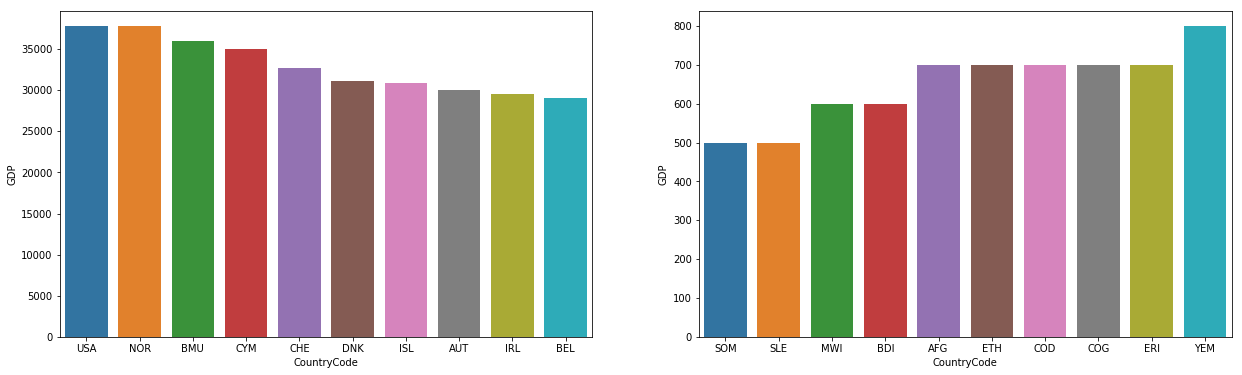

In [36]:
f, ax = plt.subplots(1, 2, figsize = (21, 6))
sns.barplot(data = datasetGDP.nlargest(10, 'GDP'), x = 'CountryCode', y = 'GDP', ax = ax[0])
sns.barplot(data = datasetGDP.nsmallest(10, 'GDP'), x = 'CountryCode', y = 'GDP', ax = ax[1])
plt.show()

In [110]:
datasetGDP.min()

CountryCode                                  AFG
HRcases                                        1
Region             ASIA (EX. NEAR EAST)         
Population                                 20579
Area                                          53
Density                                      1.8
Coastline                                      0
NetMigration                              -13.92
InfantMortality                             2.29
GDP                                          500
Literacy                                    17.6
Phones                                       0.2
Arable                                         0
Crops                                          0
Other                                      34.82
Climate                                        1
Birthrate                                   8.25
Deathrate                                   2.41
Agriculture                                    0
Industry                                   0.032
Service             

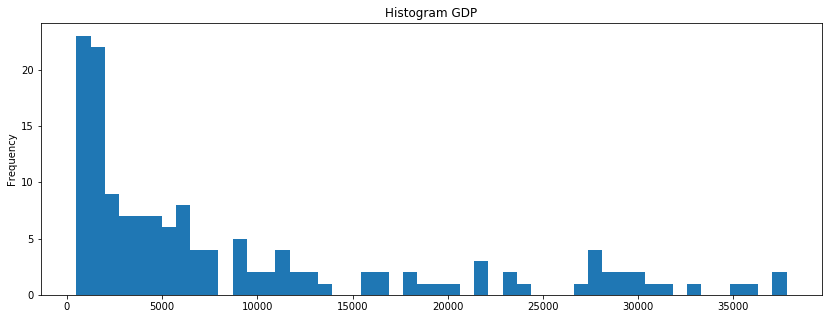

In [28]:
# GDP distribution
#Histogram
datasetGDP.GDP.plot(kind = 'hist',bins = 50,figsize = (14,5))
plt.title("Histogram GDP")
plt.show()
# The Above Histogram shows that most countries are still developing to provide good GDP for it's population 
# as most of it is having GDP less than 10000


Region
ASIA (EX. NEAR EAST)                    6817.391304
BALTICS                                11250.000000
C.W. OF IND. STATES                     3866.666667
EASTERN EUROPE                         10560.000000
LATIN AMER. & CARIB                     7596.666667
NEAR EAST                              11825.000000
NORTHERN AFRICA                         5633.333333
NORTHERN AMERICA                       36900.000000
OCEANIA                                13520.000000
SUB-SAHARAN AFRICA                      2343.902439
WESTERN EUROPE                         27931.250000
Name: GDP, dtype: float64


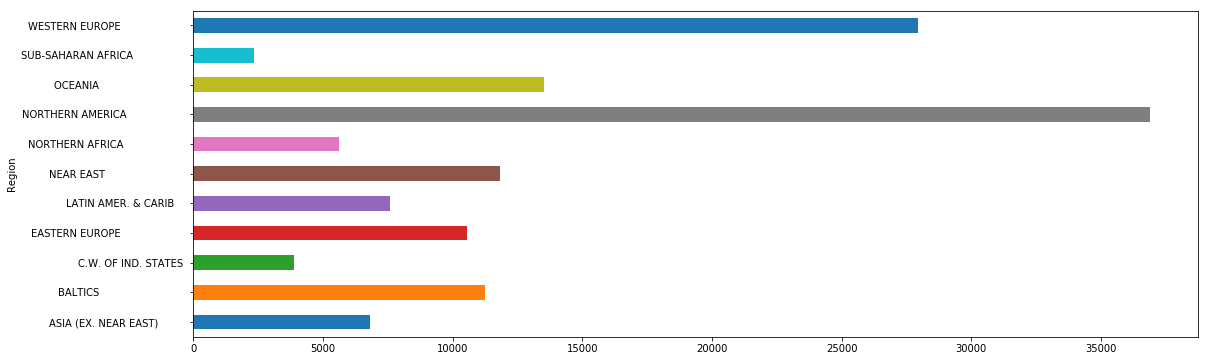

In [43]:
#GDP by Region
data1 = datasetGDP.groupby(by = ["Region"]). GDP.mean()
print(data1)
data1.plot(kind = 'barh', y  = "GDP", x="Region", figsize = (18,6))

Mean GDP:
9040.54054054054
High_Low_GDP  High_Low_GDP
High          High             47
Low           Low             101
Name: High_Low_GDP, dtype: int64
Region                               High_Low_GDP
ASIA (EX. NEAR EAST)                 Low             19
                                     High             4
BALTICS                              High             2
C.W. OF IND. STATES                  Low              9
EASTERN EUROPE                       High             3
                                     Low              2
LATIN AMER. & CARIB                  Low             21
                                     High             9
NEAR EAST                            High             7
                                     Low              5
NORTHERN AFRICA                      Low              3
NORTHERN AMERICA                     High             2
OCEANIA                              Low              3
                                     High             2
SUB-SAHARAN

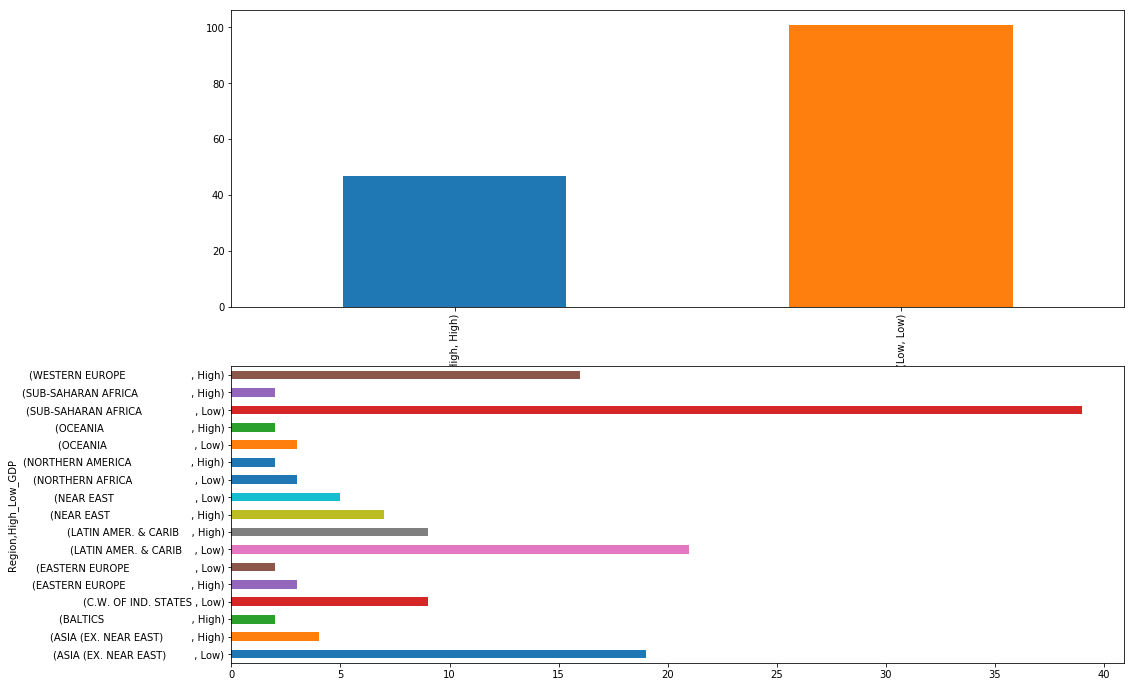

In [45]:
#Calculating Mean GDP and grouping as High or Low
Mean_GDP = datasetGDP.GDP.mean()
print("Mean GDP:")
print(Mean_GDP)
datasetGDP["High_Low_GDP"] = ["Low" if Mean_GDP > each else "High" for each in datasetGDP.GDP]
#data.head()
data1 = datasetGDP.groupby(by = "High_Low_GDP"). High_Low_GDP.value_counts()
data2 = datasetGDP.groupby(by = "Region"). High_Low_GDP.value_counts()
print(data1)
print(data2)
f, ax = plt.subplots(2,1, figsize = (16, 12))
data1.plot(kind = "bar", x = "High_Low_GDP", y = "High_Low_GDP", ax = ax[0])
data2.plot(kind = "barh", x= "Region", y="High_Low_GDP", ax = ax[1])

# POPULATION

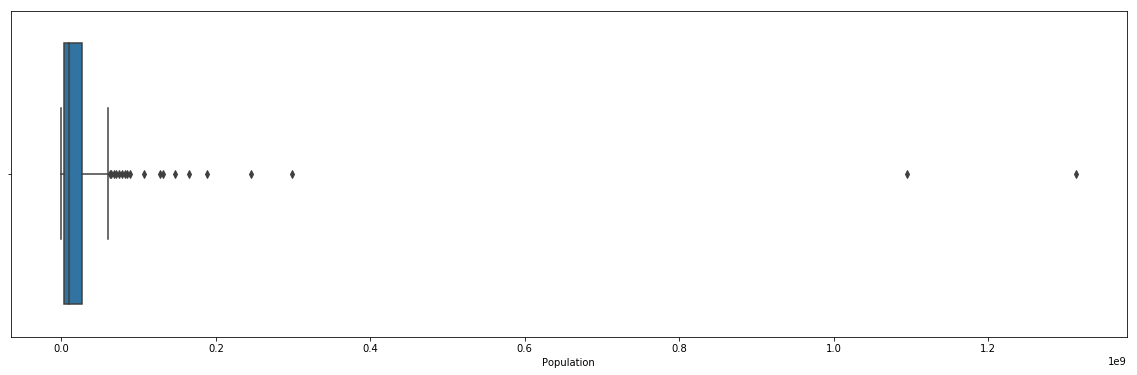

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize = (20,6))
s = sns.boxplot(data = datasetGDP, y = 'Population', orient = 'h')
# menunjukkan bahwa pada umumnya, sebuah negara memiliki populasi di bawah 1 milyar penduduk. 
# outlier pada boxplot menunjukkan negara-negara dengan populasi yang lebih besar daripada populasi pada umumnya

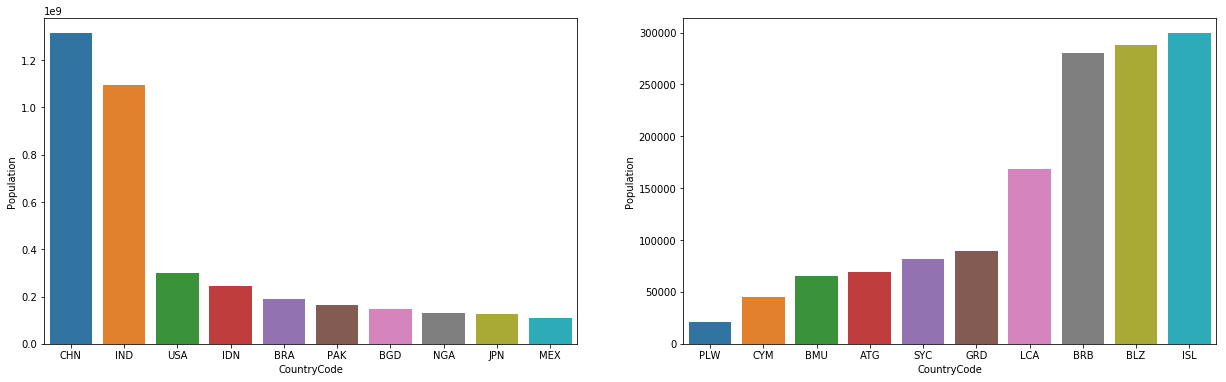

In [33]:
f, ax = plt.subplots(1, 2, figsize = (21, 6))
sns.barplot(data = datasetGDP.nlargest(10, 'Population'), x = 'CountryCode', y = 'Population', ax = ax[0])
sns.barplot(data = datasetGDP.nsmallest(10, 'Population'), x = 'CountryCode', y = 'Population', ax = ax[1])
plt.show()

In [52]:
#Identifying the relationship between GDP and Literacy
data2 = datasetGDP[["CountryCode","Region","Population","GDP"]]
#data1.head()
data2.corr()

,Population,GDP
Population,1.000000,-0.034028
GDP,-0.034028,1.000000


# AREA

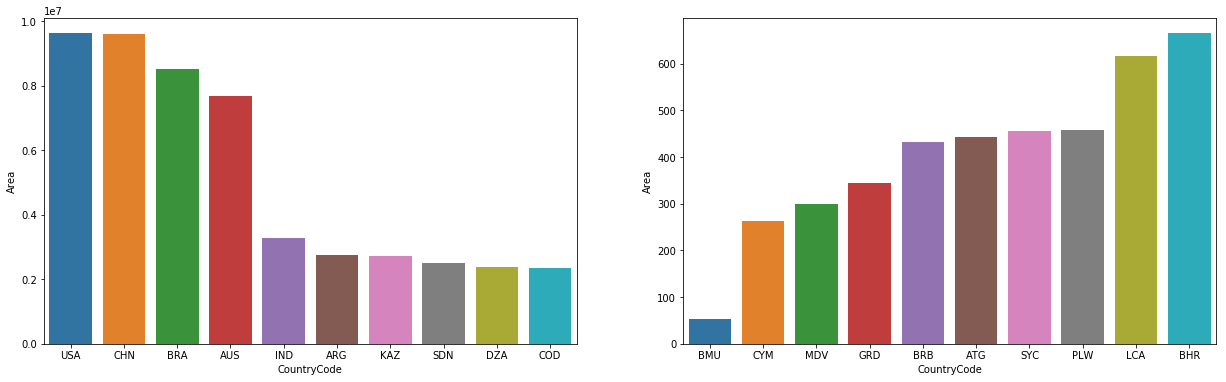

In [35]:
f, ax = plt.subplots(1, 2, figsize = (21, 6))
sns.barplot(data = datasetGDP.nlargest(10, 'Area'), x = 'CountryCode', y = 'Area', ax = ax[0])
sns.barplot(data = datasetGDP.nsmallest(10, 'Area'), x = 'CountryCode', y = 'Area', ax = ax[1])
plt.show()

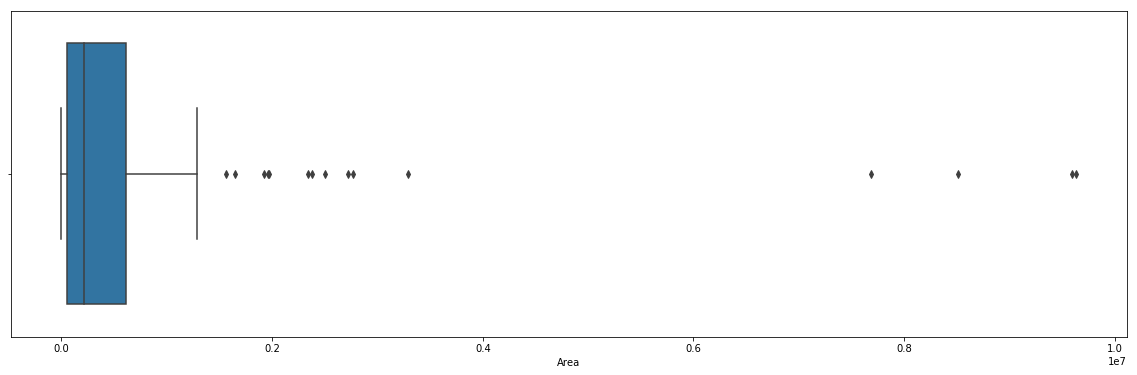

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize = (20,6))
s = sns.boxplot(data = datasetGDP, y = 'Area', orient = 'h')
# menunjukkan bahwa pada umumnya, sebuah negara memiliki area di bawah 2jt miles(2) penduduk. 
# outlier pada boxplot menunjukkan negara-negara dengan area yang lebih besar daripada populasi pada umumnya

In [53]:
#Identifying the relationship between GDP and Area
data2 = datasetGDP[["CountryCode","Region","Area","GDP"]]
#data1.head()
data2.corr()

,Area,GDP
Area,1.000000,0.079111
GDP,0.079111,1.000000


# Literacy

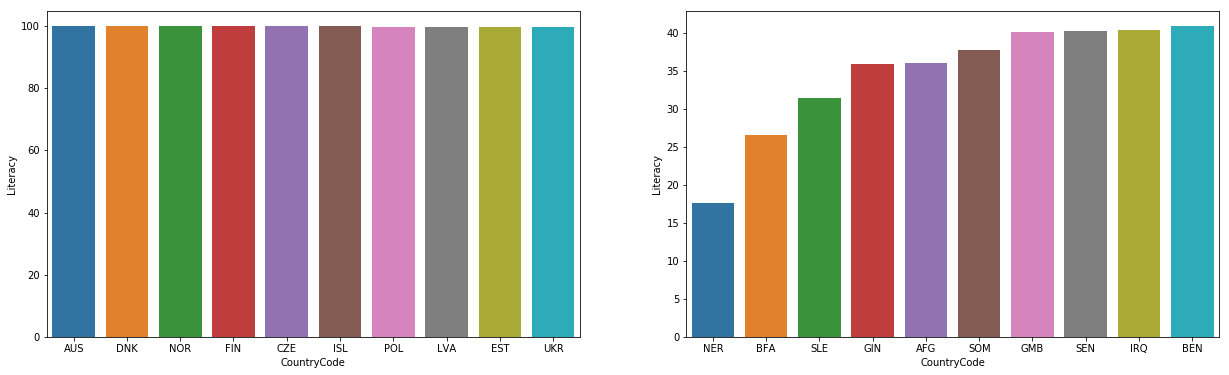

In [38]:
f, ax = plt.subplots(1, 2, figsize = (21, 6))
sns.barplot(data = datasetGDP.nlargest(10, 'Literacy'), x = 'CountryCode', y = 'Literacy', ax = ax[0])
sns.barplot(data = datasetGDP.nsmallest(10, 'Literacy'), x = 'CountryCode', y = 'Literacy', ax = ax[1])
plt.show()

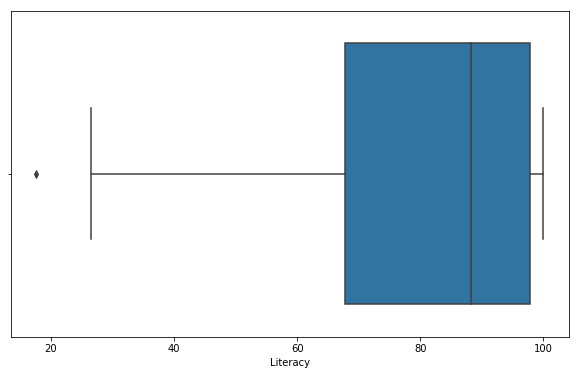

In [116]:
plt.subplots(figsize = (10,6))
s = sns.boxplot(data = datasetGDP, y = 'Literacy', orient = 'h')

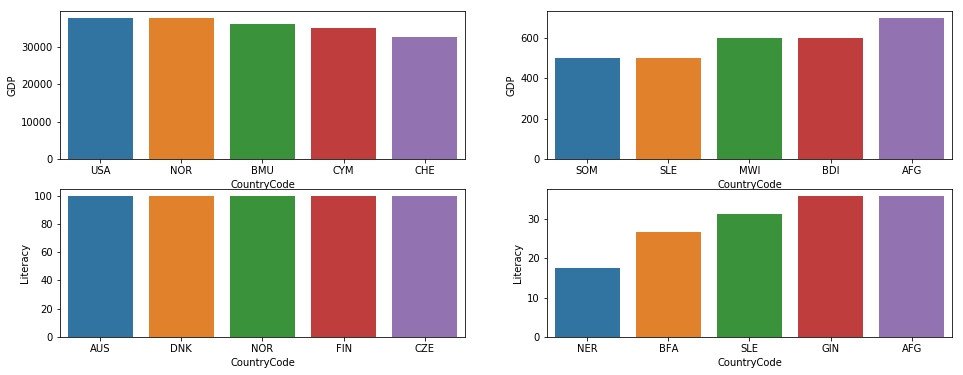

In [17]:
#Countries with Highest and Lowest GDP
f, ax = plt.subplots(2, 2, figsize = (16,6))
k1 = sns.barplot(data = datasetGDP.nlargest(5, 'GDP'), x = 'CountryCode', y = 'GDP', ax = ax[0,0])
k2 = sns.barplot(data = datasetGDP.nsmallest(5, 'GDP'), x = 'CountryCode', y = 'GDP', ax = ax[0,1])
k3 = sns.barplot(data = datasetGDP.nlargest(5, 'Literacy'), x = 'CountryCode', y = 'Literacy', ax = ax[1,0])
k4 = sns.barplot(data = datasetGDP.nsmallest(5, 'Literacy'), x = 'CountryCode', y = 'Literacy', ax = ax[1,1])
plt.show()

interesting observation

1. None of the Top 5 Countries by GDP feature in the Top 5 Countries by Literacy. Similary None of the Bottom 5 Countries by GDP feature in the Bottom 5 Countires by Literacy

2. This proves that Literacy is not the only factor that is going to determine the economy of the Countries where GDP is a representative measure of the same

In [48]:
#Identifying the relationship between GDP and Literacy
data1 = datasetGDP[["CountryCode","Region","Literacy","GDP"]]
#data1.head()
data1.corr()

,Literacy,GDP
Literacy,1.000000,0.538235
GDP,0.538235,1.000000


This shows that the GDP and Literacy are only partially related to each other i.e. 51.31%

# PHONES

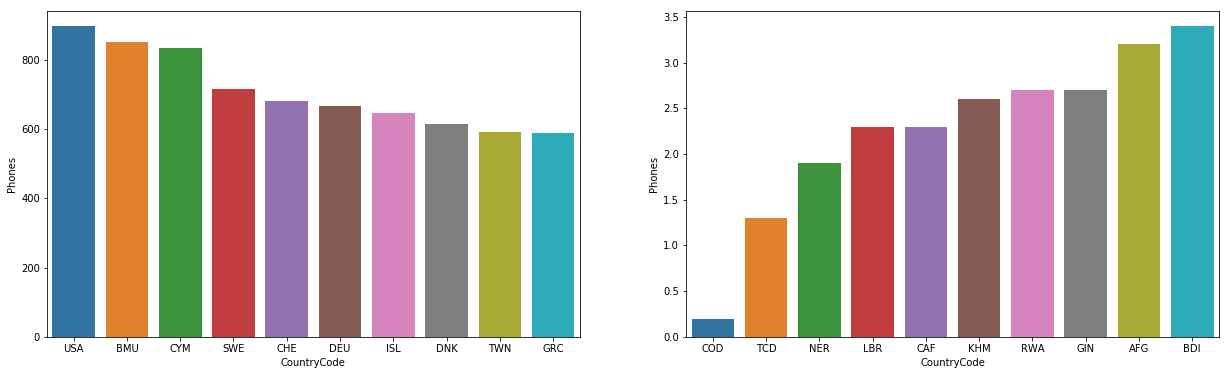

In [41]:
f, ax = plt.subplots(1, 2, figsize = (21, 6))
sns.barplot(data = datasetGDP.nlargest(10, 'Phones'), x = 'CountryCode', y = 'Phones', ax = ax[0])
sns.barplot(data = datasetGDP.nsmallest(10, 'Phones'), x = 'CountryCode', y = 'Phones', ax = ax[1])
plt.show()

In [123]:
datasetGDP.mean()

HRcases            9.812838e+01
Population         4.106565e+07
Area               6.776073e+05
Density            1.751331e+02
Coastline          8.768378e+00
NetMigration       9.412162e-02
InfantMortality    4.198480e+01
GDP                9.040541e+03
Literacy           8.046757e+01
Phones             1.965520e+02
Arable             1.456257e+01
Crops              3.191284e+00
Other              8.224554e+01
Climate            2.094595e+00
Birthrate          2.389324e+01
Deathrate          9.884865e+00
Agriculture        1.622770e-01
Industry           2.996959e-01
Service            5.374324e-01
dtype: float64

In [49]:
#Identifying the relationship between GDP and Literacy
data2 = datasetGDP[["CountryCode","Region","Phones","GDP"]]
#data1.head()
data2.corr()

,Phones,GDP
Phones,1.000000,0.914156
GDP,0.914156,1.000000
